<a href="https://colab.research.google.com/github/mahuthu/Omdena-Liberia-Chapter/blob/main/analyse_healthfacility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Paths to the GeoJSON files
points_path = "/content/drive/MyDrive/Colab Notebooks/hotosm_lbr_health_facilities_points_geojson.geojson"
polygons_path = "/content/drive/MyDrive/Colab Notebooks/hotosm_lbr_health_facilities_polygons_geojson.geojson"
# Loading the data
points_gdf = gpd.read_file(points_path)
polygons_gdf = gpd.read_file(polygons_path)
print(points_gdf.head())
print(polygons_gdf.head())

                          name name:en   amenity building healthcare  \
0  Devine Glory Medicine Store    None  pharmacy     None   pharmacy   
1   God's Favor Medicine Store    None  pharmacy     None   pharmacy   
2         God With Us Pharmacy    None  pharmacy     None   pharmacy   
3   Good Health Medicine Store    None  pharmacy     None   pharmacy   
4              Choice Pharmacy    None  pharmacy     None   pharmacy   

  healthcare:speciality operator:type capacity:persons addr:full addr:city  \
0                  None          None             None      None    Zwedru   
1                  None          None             None      None    Zwedru   
2                  None          None             None      None    Zwedru   
3                  None          None             None      None    Zwedru   
4                  None          None             None      None    Zwedru   

  source      osm_id osm_type                  geometry  
0   None  4841756305    nodes  POINT (-8

In [ ]:
#Get general info about the points dataset
points_gdf.shape
points_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   name                   707 non-null    object  
 1   name:en                1 non-null      object  
 2   amenity                740 non-null    object  
 3   building               68 non-null     object  
 4   healthcare             534 non-null    object  
 5   healthcare:speciality  42 non-null     object  
 6   operator:type          24 non-null     object  
 7   capacity:persons       0 non-null      object  
 8   addr:full              0 non-null      object  
 9   addr:city              334 non-null    object  
 10  source                 604 non-null    object  
 11  osm_id                 747 non-null    int64   
 12  osm_type               747 non-null    object  
 13  geometry               747 non-null    geometry
dtypes: geometry(1), int64(1), object(1

In [ ]:
# Displaying the 'healthcare' column values in the points table
healthcare_point = points_gdf['healthcare'].unique()
print(healthcare_point)

['pharmacy' 'clinic' None 'hospital' 'doctor' 'alternative' 'midwife'
 'laboratory']


In [ ]:
#Get general info about the polygons dataset
polygons_gdf.shape
polygons_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   name                   279 non-null    object  
 1   name:en                0 non-null      object  
 2   amenity                291 non-null    object  
 3   building               249 non-null    object  
 4   healthcare             245 non-null    object  
 5   healthcare:speciality  2 non-null      object  
 6   operator:type          3 non-null      object  
 7   capacity:persons       0 non-null      object  
 8   addr:full              0 non-null      object  
 9   addr:city              84 non-null     object  
 10  source                 257 non-null    object  
 11  osm_id                 291 non-null    int64   
 12  osm_type               291 non-null    object  
 13  geometry               291 non-null    geometry
dtypes: geometry(1), int64(1), object(1

In [ ]:
#check for missing values in the dataframe
points_gdf.isna().sum()

name                      40
name:en                  746
amenity                    7
building                 679
healthcare               213
healthcare:speciality    705
operator:type            723
capacity:persons         747
addr:full                747
addr:city                413
source                   143
osm_id                     0
osm_type                   0
geometry                   0
dtype: int64

In [ ]:
#check for missing values in the polygons dataframe
polygons_gdf.isna().sum()

name                      12
name:en                  291
amenity                    0
building                  42
healthcare                46
healthcare:speciality    289
operator:type            288
capacity:persons         291
addr:full                291
addr:city                207
source                    34
osm_id                     0
osm_type                   0
geometry                   0
dtype: int64

In [ ]:
# Merge the two datasets into a single GeoDataFrame
combined_gdf = pd.concat([points_gdf, polygons_gdf], ignore_index=True)

In [ ]:
print(combined_gdf.tail())

                                name name:en   amenity    building healthcare  \
1033          Gboleken Clinic Triage    None    clinic  commercial       None   
1034          Grand Gedeh County ETU    None  hospital        None   hospital   
1035                  Bellemu clinic    None    clinic      clinic     clinic   
1036             Snapper Hill Clinic    None    clinic      clinic     clinic   
1037  St. Joseph's Catholic Hospital    None  hospital        None   hospital   

     healthcare:speciality operator:type capacity:persons addr:full addr:city  \
1033                  None          None             None      None    Zwedru   
1034                  None          None             None      None    Zwedru   
1035                  None          None             None      None      None   
1036                  None          None             None      None  Monrovia   
1037                  None    government             None      None  Monrovia   

                          

In [ ]:
#Get general info about the dataset
combined_gdf.shape
combined_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   name                   986 non-null    object  
 1   name:en                1 non-null      object  
 2   amenity                1031 non-null   object  
 3   building               317 non-null    object  
 4   healthcare             779 non-null    object  
 5   healthcare:speciality  44 non-null     object  
 6   operator:type          27 non-null     object  
 7   capacity:persons       0 non-null      object  
 8   addr:full              0 non-null      object  
 9   addr:city              418 non-null    object  
 10  source                 861 non-null    object  
 11  osm_id                 1038 non-null   int64   
 12  osm_type               1038 non-null   object  
 13  geometry               1038 non-null   geometry
dtypes: geometry(1), int64(1), object

#### Data Preprocessing / Handling Missing Values

In [ ]:
#Check for missing values in the merged dataframe
combined_gdf.isna().sum()

name                       52
name:en                  1037
amenity                     7
building                  721
healthcare                259
healthcare:speciality     994
operator:type            1011
capacity:persons         1038
addr:full                1038
addr:city                 620
source                    177
osm_id                      0
osm_type                    0
geometry                    0
dtype: int64

Handling the Name column

In [ ]:
# Displaying the 'name' column values
unique_names = combined_gdf['name'].unique()
print(unique_names)

['Devine Glory Medicine Store' "God's Favor Medicine Store"
 'God With Us Pharmacy' 'Good Health Medicine Store' 'Choice Pharmacy'
 'Get Well Medicine Store' None 'Beawoe Brother Medicine Store'
 'Hope Medicine Store' 'Martha Tubman Memorial Hospital Pharmacy'
 'Self Help Medicine Center' 'Zwedru City Medicine Store' 'Galapo Clinic'
 'Christ the King Clinic' 'St. Kizito Clinic' 'Gbeapo Health Center'
 'Putuken Clinic' 'Putu Pennokon Clinic' 'Karlorwleh Town Clinic'
 'Little Bassa Clinic' 'African Christian Fellowship International Clinic'
 'Camphor Mission Clinic' 'Tubmanville Clinic' 'Grisgby Farm Clinic'
 'Butaw Clinic' 'Edward Memorial Clinic' 'Sinoe Rubber Company Clinic'
 'Jokoken Clinic' 'Nyennawlicken Clinic' 'Killepo Clinic'
 'Putu Jarwodee Clinic' 'Payne Town Clinic' 'Gorbowragba Clinic'
 'Menweh Walker Clinic' 'F J Grante Hospital' 'Government Camp Clinic'
 'Tuzon Clinic' 'Palala clinic' "Peter's Town Clinic" 'Worhn Clinic'
 'Tokpaipolu clinic' 'Zahn Bahnla clinic' 'Yila clin

In [ ]:
# Fill missing values in the 'name' column with 'Unknown'
combined_gdf['name'] = combined_gdf['name'].fillna('Unknown')

# Verify if the missing values have been filled
print(combined_gdf['name'].isna().sum())


0


Handling the Amenity column

In [ ]:
# Displaying the 'amenity' column values
unique_amenity = combined_gdf['amenity'].unique()
print(unique_amenity)

['pharmacy' 'clinic' 'hospital' 'doctors' None 'dentist']


In [ ]:
# Counting unique values including missing values
unique_amenity_count = combined_gdf['amenity'].value_counts(dropna=False)

# Displaying the counts
print("Counts of unique amenity values:")
print(unique_amenity_count)

Counts of unique amenity values:
clinic      796
pharmacy    139
hospital     77
doctors      18
None          7
dentist       1
Name: amenity, dtype: int64


In [ ]:
# Fill missing values in the 'amenity' column with 'Unknown'
combined_gdf['amenity'] = combined_gdf['amenity'].fillna('Unknown')

# Verify if the missing values have been filled
print(combined_gdf['amenity'].isna().sum())

0


Handling the missing values in teh building column

In [ ]:
# Displaying the 'building' column values
unique_buildings = combined_gdf['building'].unique()
print(unique_buildings)


[None 'clinic' 'yes' 'hospital' 'commercial' 'Health Center']


In [ ]:
# Counting unique values including missing values
unique_buildings_count = combined_gdf['building'].value_counts(dropna=False)

# Displaying the counts
print("Counts of unique building values:")
print(unique_buildings_count)


Counts of unique building values:
None             721
clinic           286
yes               15
hospital           8
commercial         7
Health Center      1
Name: building, dtype: int64


In [ ]:
# Create a cross-tabulation to see the relationship between 'building' and 'amenity'
relationship = pd.crosstab(combined_gdf['building'], combined_gdf['amenity'], dropna=False)

# Display the cross-tabulation
print(relationship)


amenity        Unknown  clinic  dentist  doctors  hospital  pharmacy
building                                                            
Health Center        0       0        0        0         1         0
clinic               0     282        0        0         4         0
commercial           0       6        0        0         0         1
hospital             0       1        0        0         7         0
yes                  0      10        1        1         1         2


NaN (Missing Values):

Missing values in the building column show a significant number of "clinic" (497 occurrences) and "pharmacy" amenities (136 occurrences), as well as "hospital" (64 times) and "doctors" (17 times). This indicates a large potential for inferring missing building types based on amenity values.

The logic based on the analysis.

If amenity is "clinic", then building can be inferred as "clinic".
If amenity is "hospital", then building can be inferred as "hospital".
If amenity is "doctors", then building might be more challenging to infer directly as it could be part of various types of buildings.

In [ ]:
# Applying the logic to infer missing 'building' values from 'amenity'
conditions = [
    (combined_gdf['building'].isna()) & (combined_gdf['amenity'] == 'clinic'),
    (combined_gdf['building'].isna()) & (combined_gdf['amenity'] == 'hospital'),
]

# The choices must correspond to the conditions order
choices = ['clinic', 'hospital']  # Corresponding building types

# apply these conditions and choices
combined_gdf['building'] = np.select(conditions, choices, default=combined_gdf['building'])


The generic marker "yes" for buildings has a small number of associations across different amenities, including "clinic" (10 times), "dentist" (1 time), "doctors" (1 time), "hospital" (1 time), and "pharmacy" (2 times). Given the analysis that "yes" in the building column might serve as a placeholder indicating a relevant healthcare facility without specifying the type, one can infer the specific building type based on the corresponding amenity value. This approach leverages the detailed amenity information to provide more descriptive building values, enriching your dataset's specificity and utility.

In [ ]:
# Conditions for replacing "yes" in 'building' based on 'amenity' values
conditions = [
    (combined_gdf['building'] == 'yes') & (combined_gdf['amenity'] == 'clinic'),
    (combined_gdf['building'] == 'yes') & (combined_gdf['amenity'] == 'hospital'),
]

# The choices correspond to the 'amenity' values
choices = ['clinic', 'hospital']

# Apply the conditions and choices to infer 'building' values
combined_gdf['building'] = np.select(conditions, choices, default=combined_gdf['building'])


In [ ]:
# Fill missing values in the 'building' column with 'Unknown'
combined_gdf['building'] = combined_gdf['building'].fillna('Unknown')

# Verify if the missing values have been filled
print(combined_gdf['building'].isna().sum())

0


Analysing the healthcare and the healthcare specialty columns

In [ ]:
# Displaying the 'healthcare' column values
unique_healthcare = combined_gdf['healthcare'].unique()
print(unique_healthcare)

['pharmacy' 'clinic' None 'hospital' 'doctor' 'alternative' 'midwife'
 'laboratory' 'dentist']


In [ ]:
# Displaying the 'healthcare:speciality' column values
unique_hltcarespec = combined_gdf['healthcare:speciality'].unique()
print(unique_hltcarespec)

[None 'general' 'OIC' 'general practice' 'Joseph M.Pewee' 'A.N.C' 'Doctor'
 'medical assistant' 'Registered Nurse, Certified Midwife'
 'Liberia Government Clinic' 'medication' 'No healthcare specialist'
 'medical treatment' 'emergency' 'tradition activities' 'snake bite'
 'pharmacy' 'nurses' 'Malaria, diarrhea, stidisease' 'GCHV'
 'Certified midwife and paritical nusa' 'Ries, stomach pain'
 'George Woyee' 'Krubo Kpalaga' 'Livela manyea' 'Harpawolobah Subah'
 'physician assistant' 'traditional healer' 'nurse,midwife' 'Moses F.Saah'
 'Bon Health Care' 'dentistry']


Assess the extent and pattern of missing values

In [ ]:
# Count missing values
missing_healthcare = combined_gdf['healthcare'].isna().sum()
missing_speciality = combined_gdf['healthcare:speciality'].isna().sum()

print(f"Missing 'healthcare': {missing_healthcare}")
print(f"Missing 'healthcare:speciality': {missing_speciality}")


Missing 'healthcare': 259
Missing 'healthcare:speciality': 994


#### Handling missing values through categorization for the healthcare and healthcare:speciality columns in the GeoDataFrame.

In [ ]:
# Categorizing missing values in 'healthcare' as 'Unknown'
combined_gdf['healthcare'] = combined_gdf['healthcare'].fillna('Unknown')

# Categorizing missing values in 'healthcare:speciality' as 'Unknown'
combined_gdf['healthcare:speciality'] = combined_gdf['healthcare:speciality'].fillna('Unknown')

Handling the address features: 'addr:full' and 'addr:city'

In [ ]:
# Displaying the 'addr:full' column values
unique_full_addresses = combined_gdf['addr:full'].unique()
print(unique_full_addresses)

[None]


In [ ]:
# Displaying the 'addr:full' column values
unique_city_addresses = combined_gdf['addr:city'].unique()
print(unique_city_addresses)

['Zwedru' None 'Gbarnga' 'Salayea' 'Woizi' 'Zelemai' 'Morris Subah'
 'Kpadeyea' 'Gbonyea' 'Town' 'Sanniquellie' 'Robertsports'
 'Dindinlor Town' 'Tienne' 'Jana-Wende' 'Gonelor' 'Fahnja' 'Diah'
 'Gbehley' 'Belefanai' 'Weawolo' 'Fefeh' 'Monrovia' 'Zordee' 'Gonjeh'
 'Marshall Township' 'Bonjeh' 'Kulangor' 'Korma' 'Zulor' 'Duazon' 'Bassa'
 'Kpelleh' 'Bamballa' 'Gbalatuah' 'Naama' 'Bangorma' 'Lorma Village'
 'Kumabu' 'Lugbleh' 'Kumgbor' 'Womai' 'Rims Town' 'Zorzor' 'Senjah'
 'Damballa' 'Benewolor' 'Gbondoi' 'Tenegar' 'Vahun' 'Kiantahun' 'Kolahun'
 'Mbalotahun' 'Popalahun' 'Foya Tengia' 'Kamatahun' 'Lemgbaga'
 'Fatuk Robert' 'Loleyah Kollie' 'Yegbedu' 'Balahun' 'Korworhun'
 'Barzawon' 'L P M C Camp' 'Camp 4' 'Charlesville' 'Gonbu' 'Boway'
 'Paynesville' 'Grand Cess / Wedabo' 'Dagweh']


In [ ]:
# Counting unique values including missing values
unique_cityaddr_count = combined_gdf['addr:city'].value_counts(dropna=False)

# Displaying the counts
print("Counts of unique city addresses values:")
print(unique_cityaddr_count)

Counts of unique city addresses values:
None             620
Monrovia         188
Gbarnga           78
Zwedru            42
Paynesville       17
                ... 
Gbalatuah          1
Bangorma           1
Lorma Village      1
Kumabu             1
Dagweh             1
Name: addr:city, Length: 71, dtype: int64


- View the datatype in the geometry column

In [ ]:
print(combined_gdf.geom_type)

0         Point
1         Point
2         Point
3         Point
4         Point
         ...   
1033    Polygon
1034    Polygon
1035    Polygon
1036    Polygon
1037    Polygon
Length: 1038, dtype: object


- It is essential to identify the missing city or locality of healthcare facilities, as this information can significantly impact the prediction accuracy and the allocation of medical resources.  we employ reverse geocoding, a process that converts geographic coordinates (latitude and longitude) back into human-readable addresses or city names.

- Convert the polygons to points to make it easier for the analysis

In [ ]:
#Converting Polygons to Representative Points
combined_gdf['point_geometry'] = combined_gdf.apply(
    lambda row: row['geometry'].representative_point() if row['geometry'].geom_type == 'Polygon' else row['geometry'],
    axis=1
)


- Extracting City Names: The API response is parsed to retrieve the city name, accommodating various administrative levels (city, town, village, hamlet) to maximize the extraction success rate. In cases where the API does not return a city name, we default to 'Unknown'.
- Iterate through the GeoDataFrame, checking each geometry's type. If the geometry is a Polygon (or potentially a MultiPolygon), replace it with a representative point (e.g., the centroid or a point guaranteed to be within the polygon).

In [ ]:
import requests
import time

def reverse_geocode(point):
    """Reverse geocode a point to get city name using Nominatim API."""
    lat, lon = point.y, point.x
    url = 'https://nominatim.openstreetmap.org/reverse'
    params = {'lat': lat, 'lon': lon, 'format': 'json', 'addressdetails': 1}

    response = requests.get(url, params=params)
    time.sleep(7)
    if response.status_code == 200:
        data = response.json()
        # Extracting city name; adapt as needed based on response structure
        city = data.get('address', {}).get('city',
                                   data.get('address', {}).get('town',
                                                               data.get('address', {}).get('village',
                                                                                           data.get('address', {}).get('hamlet', 'Unknown'))))
        return city
    else:
        return 'Unknown'

- Updating the DataFrame: The inferred city names are then populated back into the original GeoDataFrame, filling the dataset with valuable locational data that was previously missing.

In [ ]:
%%time
# Filter rows where 'addr:city' is missing
missing_city_gdf = combined_gdf[combined_gdf['addr:city'].isna()]

# Apply reverse geocoding to infer 'addr:city' (consider rate-limiting and API usage policies)
missing_city_gdf['inferred_city'] = missing_city_gdf['point_geometry'].apply(reverse_geocode)

CPU times: user 1min 7s, sys: 3.46 s, total: 1min 10s
Wall time: 1h 17min 6s


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
print(missing_city_gdf['inferred_city'].value_counts())


Unknown                71
Monrovia               31
Kakata                 20
Harper                 17
Buchanan               16
                       ..
Kanga                   1
Sackie                  1
Dennis                  1
Centrel Lloydsville     1
Fargo                   1
Name: inferred_city, Length: 260, dtype: int64


In [ ]:
combined_gdf.loc[combined_gdf['addr:city'].isna(), 'addr:city'] = missing_city_gdf['inferred_city']

In [ ]:
print(combined_gdf['addr:city'].value_counts())

Monrovia               219
Gbarnga                 81
Unknown                 71
Zwedru                  44
Kakata                  20
                      ... 
Nbaloma                  1
Sackie                   1
Dennis                   1
Centrel Lloydsville      1
Fargo                    1
Name: addr:city, Length: 317, dtype: int64


- Handling capacity:persons column

In [ ]:
# Counting unique values including missing values
unique_capacity_count = combined_gdf['capacity:persons'].value_counts(dropna=False)
print(unique_capacity_count)

None    1038
Name: capacity:persons, dtype: int64


- Dealing with the missing values in the operator:type column

In [ ]:
# Counting unique values including missing values
unique_operator_count = combined_gdf['operator:type'].value_counts(dropna=False)
print(unique_operator_count)

None                  1011
private_individual      18
government               3
private                  3
union_association        1
private_profit           1
public                   1
Name: operator:type, dtype: int64


In [ ]:
# Categorizing missing values in 'healthcare:speciality' as 'Unknown'
combined_gdf['operator:type'] = combined_gdf['operator:type'].fillna('Unknown')

- Dealing with the missng values in source column

In [ ]:
# Counting unique values including missing values
unique_source_count = combined_gdf['source'].value_counts(dropna=False)
print(unique_source_count)

Ministry of Health and National Public Health Institute of Liberia      282
None                                                                    177
MOH & NPHIL                                                             155
Ministry of Health and national :Public Institute                        91
Red Cross Field Survey                                                   73
Ministry of Health and National Public Institite of Liberia              59
Ministry of Health & Natinal Public Health Institude                     52
Ministry of Health and National Public Health Institute                  45
Ministry of Health                                                       34
Open Cities Monrovia - HOT Field Survey                                  16
Ministry of Health and National Public Institute of Liberia              10
WNA Hub - TFiRL project                                                   9
MoH & NPHIL                                                               7
National Pub

- The output of the source column indicates a mix of clearly defined sources and some inconsistencies in naming conventions, leading to fragmentation of what appears to be similar or identical sources.
- This will be handled by Standardization of Source Names. The goal here is to consolidate variations of the same source name into a single, standardized form. This can significantly improve the quality of the data analysis by reducing redundancy and making categorical analyses more meaningful. The Ministry of Health and National Public Health Institute of Liberia" vs. "Ministry of Health and National Public Institite of Liberia are essentially the same but have been entered with slight variations.

In [ ]:
# Creating a mapping of variations to standardized names
source_mapping = {
    "Ministry of Health and National Public Health Institute of Liberia": ["Ministry of Health and National Public Health Institute of Liberia", "Ministry of Health", "MOH & NPHIL", "National Public Health Institute of Liberia (NPHIL)", "Ministry of Health and national :Public Institute", "Ministry of Health and National Public Institite of Liberia", "Ministry of Health & Natinal Public Health Institude", "Ministry of Health and National Public Health Institute", "Ministry of Health and National Public Institute of Liberia", "MoH & NPHIL", "Ministry of Health & National Public Health Institutue of Liberia", "Ministry of Health & National Public Health Institute of Liberia", "MOH&NPHIL"],
    "Red Cross Field Survey": ["Red Cross Field Survey"],
    "Open Cities Monrovia - HOT Field Survey": ["Open Cities Monrovia - HOT Field Survey", "HOTOSM-DAI-LEGIT Field Survey"],
    "WNA Hub - TFiRL project": ["WNA Hub - TFiRL project", "WNA Hub -TFiRL project"],
    "UNMEER": [ "UNMEER ;"],
    "GNS": ["GNS", "GNS;Personal knowledge"],
    "Bing": ["Bing", "bing"],
}

# Function to standardize source names
def standardize_source_name(source):
    for standardized, variations in source_mapping.items():
        if source in variations:
            return standardized
    return source

# Apply the standardization function to the 'source' column
combined_gdf['source'] = combined_gdf['source'].apply(standardize_source_name)

In [ ]:
# Categorizing missing values in 'source' as 'Unknown'
combined_gdf['source'] = combined_gdf['source'].fillna('Unknown')

In [ ]:
import re

def preprocess_source(source):
    # Regular expression to match URLs
    url_pattern = r'https?://\S+|www\.\S+'
    # Replace URLs with an empty string
    cleaned_source = re.sub(url_pattern, '', source)

    # Remove semicolons and strip trailing spaces
    cleaned_source = cleaned_source.replace(';', '').strip()

    return cleaned_source

# Apply the enhanced preprocessing function to the 'source' column
combined_gdf['source'] = combined_gdf['source'].apply(preprocess_source)


- Handling None values by replacing them with Unknown; which is a more descriptive placeholder

In [ ]:
print(combined_gdf['source'].value_counts(dropna=False))

Ministry of Health and National Public Health Institute of Liberia    745
Unknown                                                               177
Red Cross Field Survey                                                 73
Open Cities Monrovia - HOT Field Survey                                19
WNA Hub - TFiRL project                                                10
UNMEER                                                                  7
GNS                                                                     3
Bing                                                                    3
UNMILGNS                                                                1
Name: source, dtype: int64


-  Handling the name:en, capacity:persons, and addr:full columns.
- Drop the name:en, capacity:persons, and addr:full columns. Since there are no values for all the rows.

In [ ]:
# Dropping the 'name:en', 'capacity:persons', and 'addr:full' columns
combined_gdf = combined_gdf.drop(columns=['name:en', 'capacity:persons', 'addr:full'])

In [ ]:
combined_gdf.isna().sum()

name                     0
amenity                  0
building                 0
healthcare               0
healthcare:speciality    0
operator:type            0
addr:city                0
source                   0
osm_id                   0
osm_type                 0
geometry                 0
point_geometry           0
dtype: int64

#### EXPLORATORY DATA ANALYSIS

#### Distribution of Categories
Examine the distribution for the categorical data to get a sense of the distribution and central tendencies.

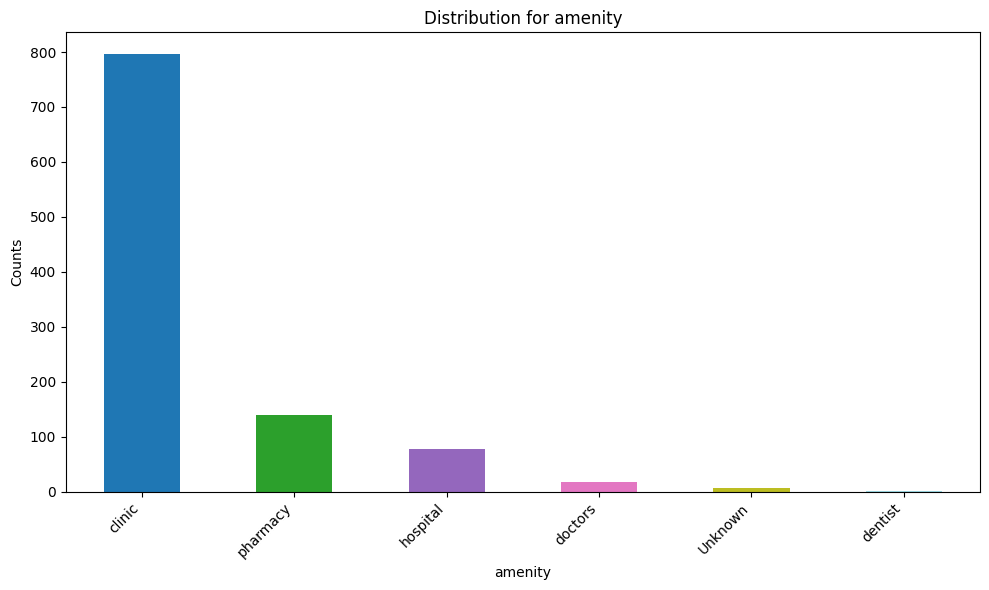

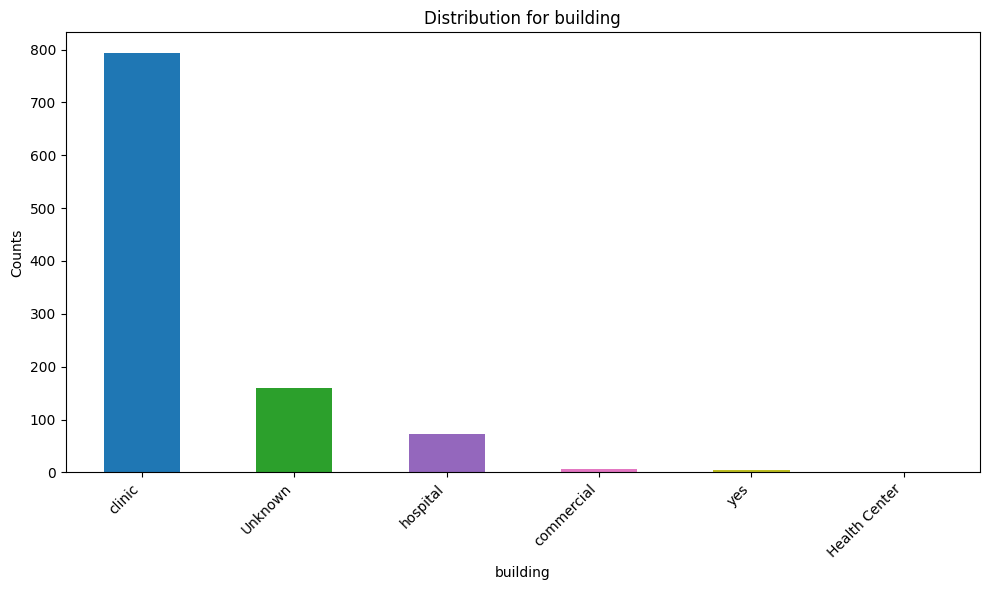

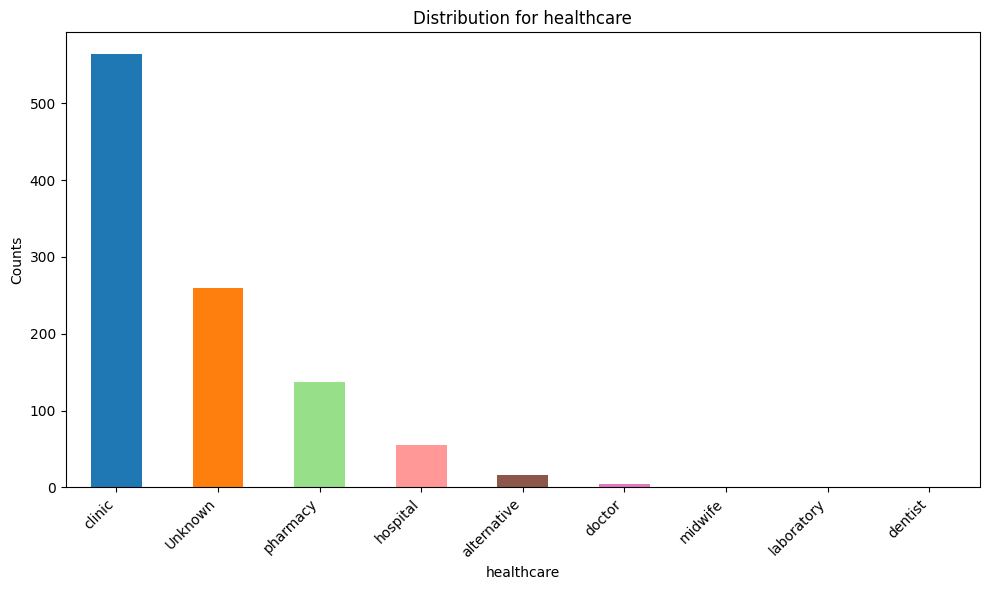

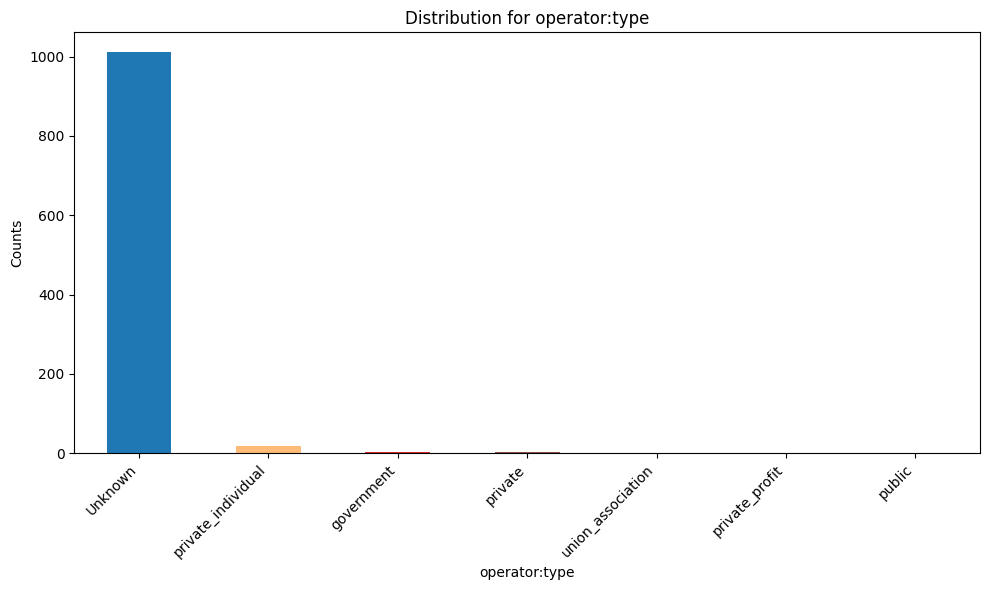

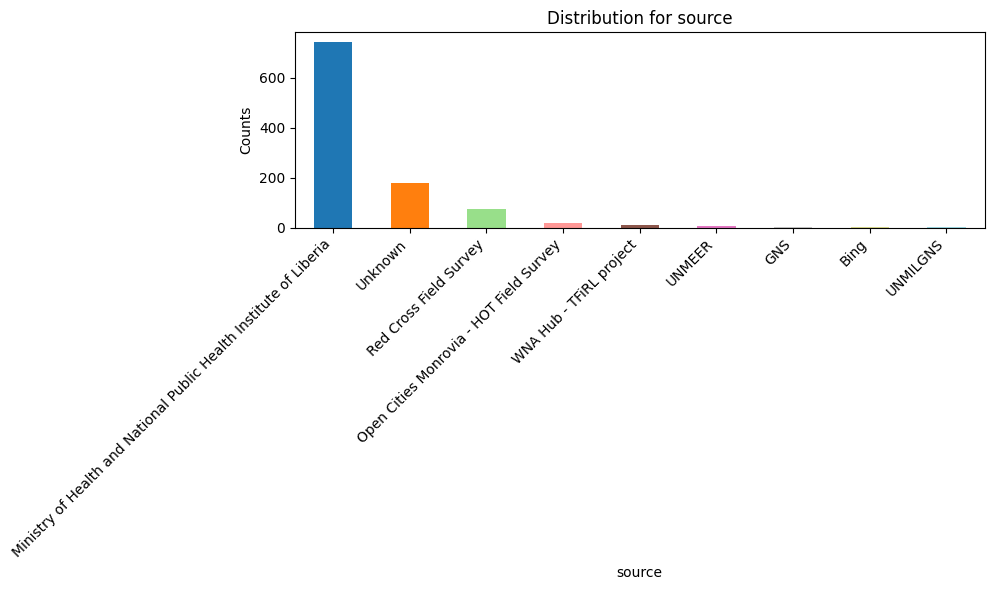

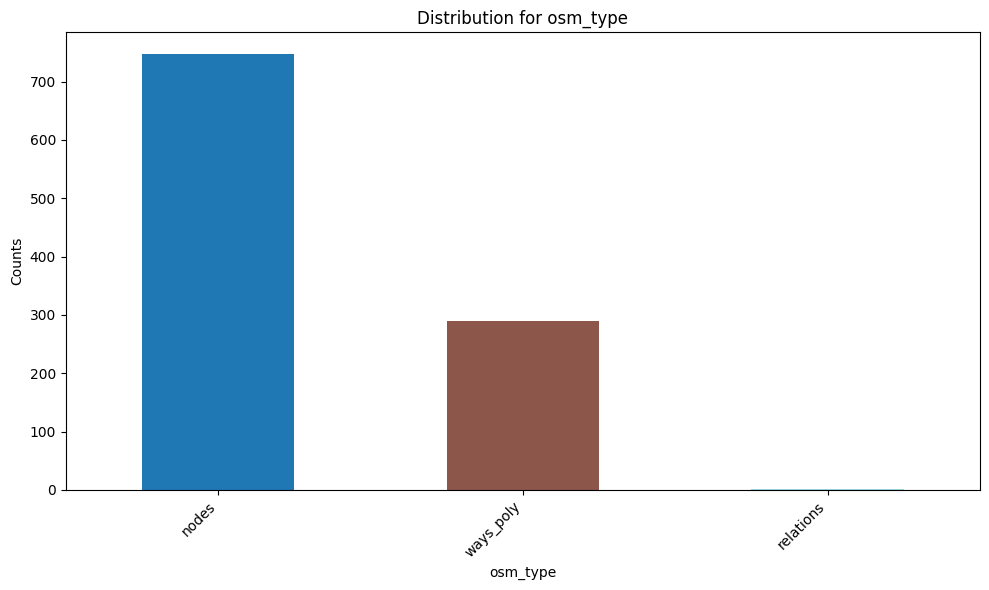

In [ ]:

# Setting the size of the plots
plt.rcParams['figure.figsize'] = [10, 6]

for column in ['amenity', 'building', 'healthcare', 'operator:type', 'source', 'osm_type']:
    # Count the unique values in the column
    value_counts = combined_gdf[column].value_counts()

    colors = plt.cm.tab20(np.linspace(0, 1, len(value_counts)))

    # Create a bar plot for the value counts
    value_counts.plot(kind='bar', color=colors)
    plt.title(f'Distribution for {column}')
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show the plot
    plt.show()


Visualisation of Amenities within the cities

Spatial Relationships: Let's analyze how different categories are distributed across space. For example, are certain types of amenities more common in specific cities or areas?
first, I'll create a pivot table that counts the number of each amenity type within each city. Then plot the distribution of a specific type of amenity across different cities.

In [ ]:
# Create a pivot table with counts of amenities for each city
city_amenity_counts = combined_gdf.pivot_table(index='addr:city', columns='amenity', aggfunc='size', fill_value=0)

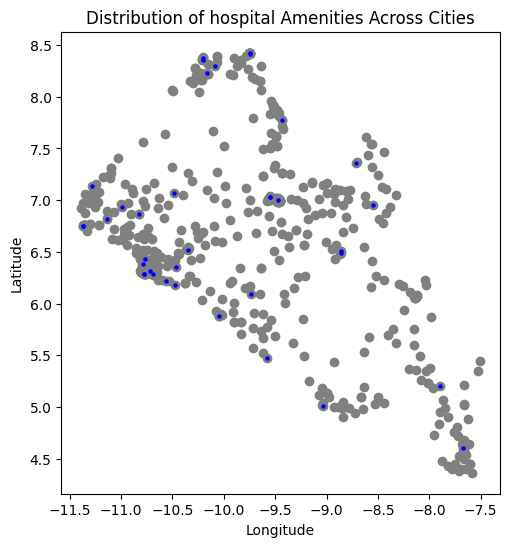

In [ ]:
def plot_amenity_distribution(amenity_type):
    # Filter the GeoDataFrame for the specific amenity type
    amenity_gdf = combined_gdf[combined_gdf['amenity'] == amenity_type]

    # Plot the points
    fig, ax = plt.subplots(figsize=(10, 6))
    base = combined_gdf.plot(color='gray', ax=ax)
    amenity_gdf.plot(ax=base, marker='o', color='blue', markersize=5)

    plt.title(f'Distribution of {amenity_type} Amenities Across Cities')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Call the function with an amenity type
plot_amenity_distribution('hospital')


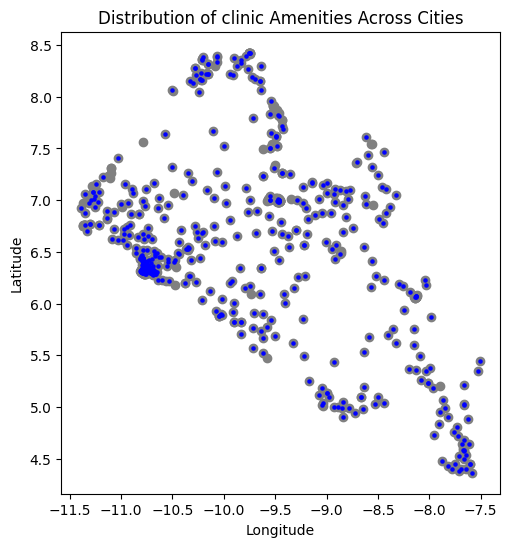

In [ ]:
# Call the function with an amenity type
plot_amenity_distribution('clinic')

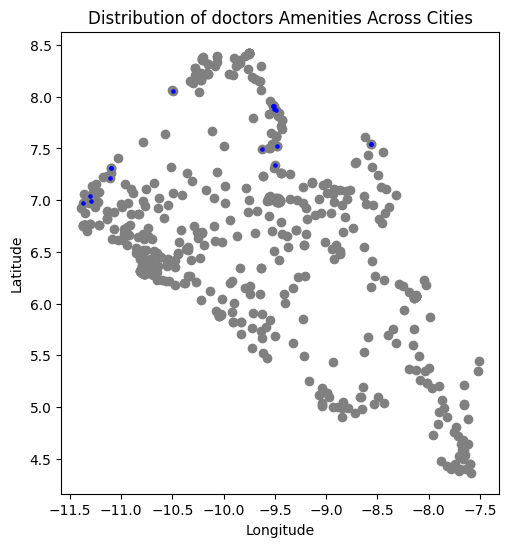

In [ ]:
# Call the function with an amenity type
plot_amenity_distribution('doctors')

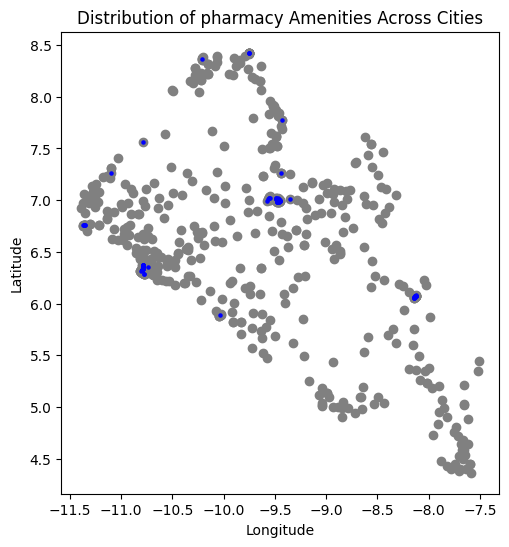

In [ ]:
# Call the function with an amenity type
plot_amenity_distribution('pharmacy')

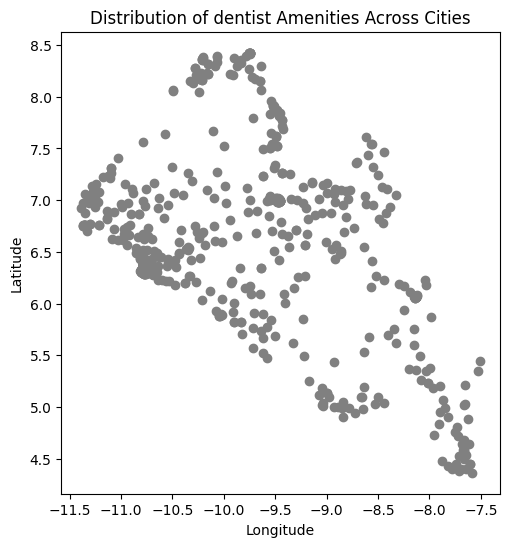

In [ ]:
# Call the function with an amenity type
plot_amenity_distribution('dentist')

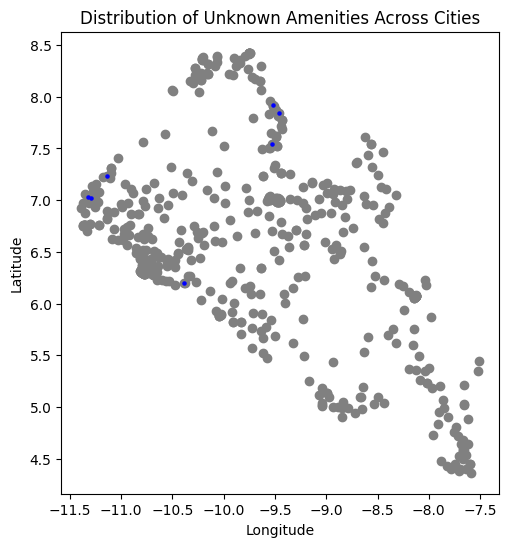

In [ ]:
# Call the function with an amenity type
plot_amenity_distribution('Unknown')

#### Heatmap visualisation of the different amenities
In this section, we aim to visualize the geographical distribution of healthcare amenities, specifically focusing on hospitals, clinics, phamacies and doctors across the landscape. Understanding the spatial distribution of healthcare facilities is crucial for identifying areas of high concentration and potential gaps in healthcare access. To achieve this, we utilize Folium, and the heatmap plugin provided by folium

In [ ]:
import folium
from folium.plugins import HeatMap

def plot_amenity_heatmap(amenity_type):
    # Filter the GeoDataFrame for the specific amenity type
    amenity_gdf = combined_gdf[combined_gdf['amenity'] == amenity_type]

    # Initialize a Folium map at a global scale
    m = folium.Map(location=[0, 0], zoom_start=6)

    # Extract latitude and longitude from the point geometry
    heat_data = [[point.y, point.x] for point in amenity_gdf['point_geometry']]

    # Create a HeatMap layer and add it to the map
    HeatMap(heat_data).add_to(m)

    # Return the map
    return m

# Call the function with an amenity type and display the map
hospitalamenity_heatmap = plot_amenity_heatmap('hospital')

# Save the heatmap to an HTML file
hospitalamenity_heatmap.save('hospitalamenity_heatmap.html')
hospitalamenity_heatmap


In [ ]:
# Call the function with clinic amenity type and display the map
clinicamenity_heatmap = plot_amenity_heatmap('clinic')

# Save the heatmap to an HTML file
clinicamenity_heatmap.save('clinicamenity_heatmap.html')
clinicamenity_heatmap


In [ ]:
# Call the function with pharmacy amenity type and display the map
pharmacyamenity_heatmap = plot_amenity_heatmap('pharmacy')


# Save the heatmap to an HTML file
pharmacyamenity_heatmap.save('pharmacyamenity_heatmap.html')
pharmacyamenity_heatmap

In [ ]:
# Call the function with doctors amenity type and display the map
doctorsamenity_heatmap = plot_amenity_heatmap('doctors')

# Save the heatmap to an HTML file
doctorsamenity_heatmap.save('doctorsamenity_heatmap.html')
doctorsamenity_heatmap

#### Density Heatmaps of the health faclities in Liberia
To visualize the concentration of facilities in different cities in Liberia. This visualization will help us identify areas with higher concentrations of facilities. It gives a visual representation of where facilities are most densely located, highlighting areas of high concentration.

In [ ]:
# Create a map object, centered on the average latitude and longitude of the points
m = folium.Map(location=[combined_gdf['point_geometry'].y.mean(), combined_gdf['point_geometry'].x.mean()], zoom_start=6)

# Extract the latitude and longitude of each amenity as tuples
heat_data = [(point.y, point.x) for point in combined_gdf['point_geometry']]

# Create a HeatMap layer and add it to the map object
HeatMap(heat_data).add_to(m)

m.save('healthcarefacilities_map.html')

# Display map
m

In [ ]:
# Assuming 'm' is your Folium map object
m.save('heatmap.html')

#### Spatial distribution of the health care facilities
Let's explore spatial distributions of healthcare using geospatial coordinates in scatter plots.

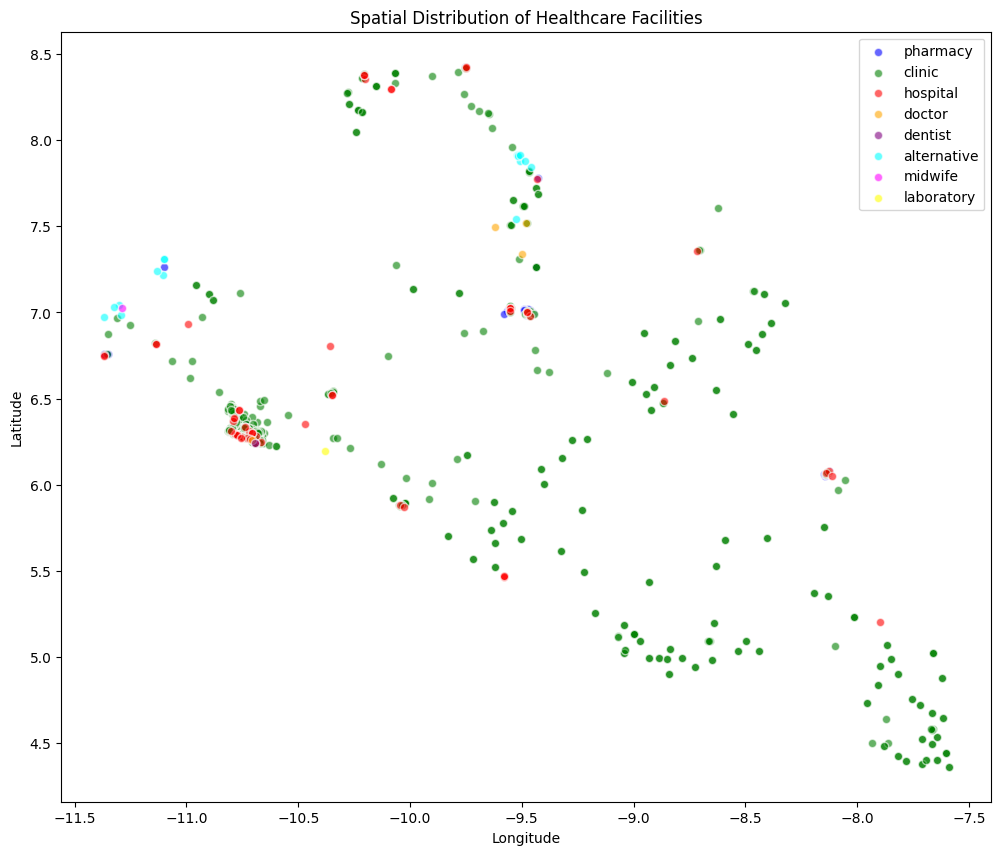

In [ ]:
# Extract longitude and latitude from the Point geometry
combined_gdf['longitude'] = combined_gdf.point_geometry.x
combined_gdf['latitude'] = combined_gdf.point_geometry.y

# Create a scatter plot
plt.figure(figsize=(12, 10))

# You can use a dictionary to map healthcare types to colors if you have a limited number of unique values
colors = {'pharmacy': 'blue', 'clinic': 'green', 'hospital': 'red', 'doctor': 'orange', 'dentist': 'purple', 'alternative': 'cyan', 'midwife': 'magenta', 'laboratory': 'yellow'}

# Loop through the healthcare types and plot each one separately
# This allows for a legend and different colors for each category
for healthcare_type, color in colors.items():
    subset = combined_gdf[combined_gdf['healthcare'] == healthcare_type]
    plt.scatter(subset['longitude'], subset['latitude'], c=color, label=healthcare_type, alpha=0.6, edgecolors='w')

# Add titles and labels
plt.title('Spatial Distribution of Healthcare Facilities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a legend
plt.legend()

# Show the plot
plt.show()


#### Granular view of the different healthcare facilities
In this analysis, the focus is on visualizing the distribution of the different healthcare facilities especially clinicas and hospitals within the region of interest. Clinics and hospitals, as primary healthcare facilities, play a pivotal role in delivering healthcare services. To understand their spatial distribution, we employ a geospatial approach leveraging the capabilities of Folium, a Python library well-suited for creating interactive maps.

- Granular visualisation of the clinics in the cities

In [ ]:
# Filter the GeoDataFrame to include only rows where the healthcare column is categorized as 'clinic'.
clinics_gdf = combined_gdf[combined_gdf['healthcare'] == 'clinic']

# Create a base map
m = folium.Map(location=[combined_gdf['latitude'].mean(), combined_gdf['longitude'].mean()], zoom_start=6)

# Generate a list of coordinates from the clinics GeoDataFrame
clinic_locations = clinics_gdf['point_geometry'].apply(lambda p: [p.y, p.x]).tolist()

# Create and add a heat map layer
HeatMap(clinic_locations).add_to(m)

m.save('clinics_map.html')
# Display the map
m



- Granular visualisation of the hospitals

In [ ]:
# Filter the GeoDataFrame to include only rows where the healthcare column is categorized as 'clinic'.
hospital_gdf = combined_gdf[combined_gdf['healthcare'] == 'hospital']

# Create a base map
m = folium.Map(location=[combined_gdf['latitude'].mean(), combined_gdf['longitude'].mean()], zoom_start=6)

# Generate a list of coordinates from the clinics GeoDataFrame
hospital_locations = hospital_gdf['point_geometry'].apply(lambda p: [p.y, p.x]).tolist()

# Create and add a heat map layer
HeatMap(hospital_locations).add_to(m)

m.save('hospital_map.html')
# Display the map
m

#### Identify the top 10 healthcare facilities acrooss the different cities / areas of Liberia.
- In this segment, the focus is on the distribution of healthcare facilities across different cities, with a particular focus on identifying the top 10 cities boasting the highest number of healthcare establishments in Liberia. This analysis is pivotal for understanding the urban-rural divide in healthcare accessibility and for spotlighting areas that may serve as healthcare hubs within the region. Exploring the distribution of healthcare facilities across different cities or areas could show regional disparities in healthcare provision or specializations in certain areas.

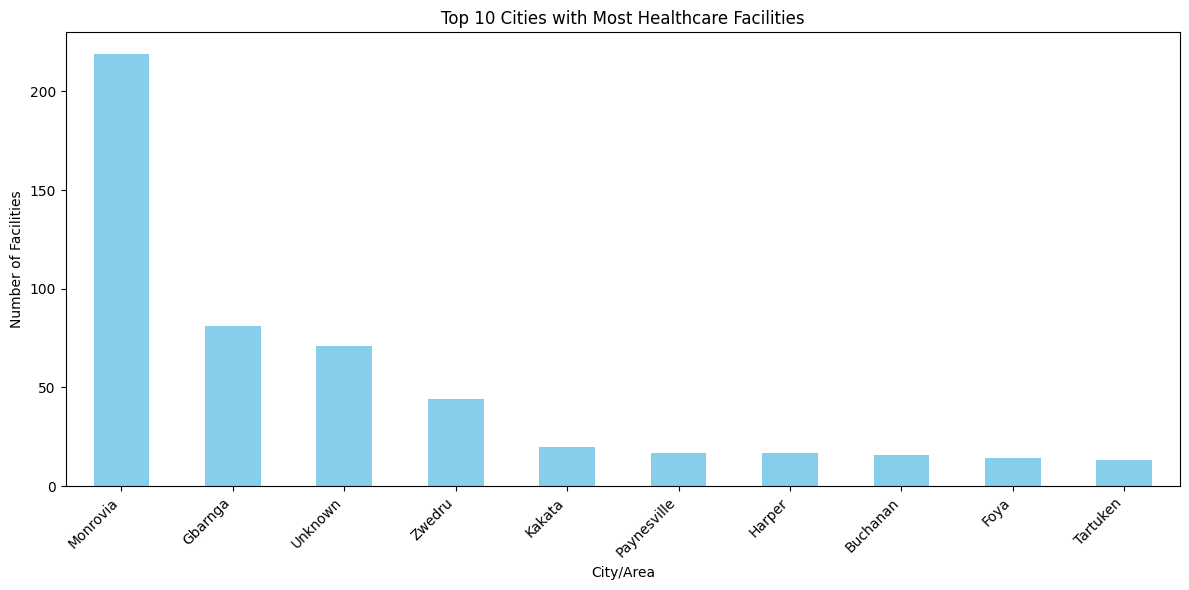

In [ ]:
# Group the data by city and count the occurrences
city_counts = combined_gdf['addr:city'].value_counts()

# Display the top 10 cities with the most facilities
top_cities = city_counts.head(10)

# Create a bar plot showing the number of healthcare facilities per city
plt.figure(figsize=(12, 6))  # Set the figure size here before plotting
top_cities.plot(kind='bar', color='skyblue')  # Plot only the top cities

plt.title('Top 10 Cities with Most Healthcare Facilities')
plt.xlabel('City/Area')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


- The focus of this analysis is to uncover the cities with the least healthcare facilities within our dataset. This examination is crucial for identifying potential gaps in healthcare access, especially in regions that might be underserved or overlooked in healthcare planning and accessibility to malaria interventions.

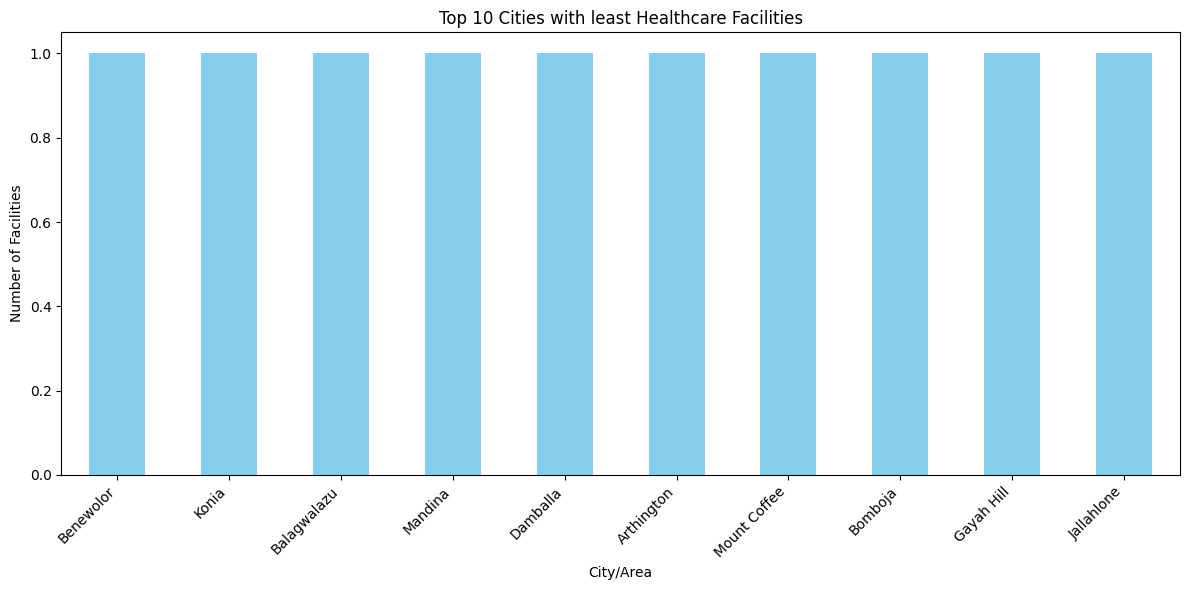

In [ ]:
# Display the top 10 cities with the most facilities
least_cities = city_counts.nsmallest(10)

# Create a bar plot showing the number of healthcare facilities per city
plt.figure(figsize=(12, 6))
least_cities.plot(kind='bar', color='skyblue')

plt.title('Top 10 Cities with least Healthcare Facilities')
plt.xlabel('City/Area')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- The next analysis is a detailed analysis focusing on the cities with the least healthcare facilities. By filtering our comprehensive GeoDataFrame to include only those cities identified as having the least healthcare facilities, we gain a focused view on areas potentially at higher risk of malaria outbreaks due to inadequate healthcare infrastructure.

In [ ]:
# Filter the original GeoDataFrame for only the cities in 'least_cities'
least_cities_gdf = combined_gdf[combined_gdf['addr:city'].isin(least_cities.index)]

# Aggregate point data for these cities
least_cities_points = least_cities_gdf.groupby('addr:city')['point_geometry'].apply(lambda x: x.iloc[0])

# Convert this to a simple DataFrame for easier processing
least_cities_df = least_cities_points.to_frame(name='point_geometry').reset_index()
least_cities_df['facility_count'] = least_cities_df['addr:city'].map(least_cities)


In [ ]:
# Ensure that the 'point_geometry' column is used for mean location calculation
mean_location = [combined_gdf['point_geometry'].y.mean(), combined_gdf['point_geometry'].x.mean()]

# Initialize the map with the mean location
m = folium.Map(location=mean_location, zoom_start=6)

# Assuming 'least_cities_df' contains the top 10 least cities with their 'point_geometry'
# Create the heat map layer using the 'point_geometry' column
heat_data = [
    [geom.y, geom.x] for geom in least_cities_df['point_geometry']
]

HeatMap(heat_data).add_to(m)

#save to an HTML file to open in a browser
m.save('least_cities_heatmap.html')

# Display the map in a Jupyter notebook
m


#### Visualise the ralationship between the healthcare facilities and their operator types
Is there a relationship between the types of healthcare facilities and their operator types? create a crosstabulation and visualize it with a dot plot. The plot will show you how different healthcare facilities (like hospitals, clinics, pharmacies, etc.) are distributed across different operator types (like government, private, non-profit, etc.)
Dot plots can show the count of facilities for each operator type within each healthcare category, which is similar to a bar chart but can be more effective when there are many categories as is htie case witht his dataset.

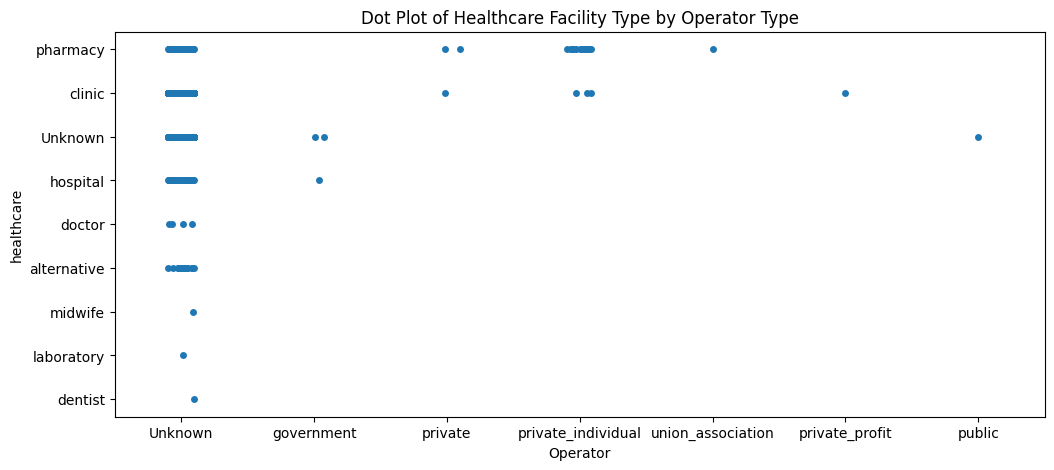

In [ ]:
# Creating a long-form dataframe for faceting
long_df = combined_gdf.melt(id_vars='healthcare', value_vars='operator:type', var_name='Variable', value_name='Operator')

# Plotting the dot plot
plt.figure(figsize=(12, 5))
sns.stripplot(data=long_df, x='Operator', y='healthcare', jitter=True)
plt.title('Dot Plot of Healthcare Facility Type by Operator Type')
plt.show()
